In [3]:
import pandas as pd

from utils import get_md_for_coins, MAX_DAYS_FOR_HOURLY_DATA

window_size = 24 * 7
id_list = ['bitcoin', 'ethereum', 'solana']

end_ts = pd.Timestamp.now()
# end_ts = pd.Timestamp('12/18/2021')
# end_ts = end_ts.tz_localize(tz='US/Central').tz_convert(tz='utc')
start_ts = pd.Timestamp('1/1/2020')

print(start_ts, end_ts)

2020-01-01 00:00:00 2021-12-31 21:59:29.497457


2020-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-10-13 22:02:19.078000
                              bitcoin
ts                                   
2020-01-01 00:03:57.103   7195.153895
2020-01-01 01:00:43.088   7176.662158
2020-01-01 02:02:54.112   7204.763276
2020-01-01 03:09:00.451   7229.077200
2020-01-01 04:00:38.015   7221.090859
...                               ...
2021-12-31 17:06:24.853  47506.647047
2021-12-31 18:06:43.147  47040.673789
2021-12-31 19:03:19.957  46608.214507
2021-12-31 20:07:17.546  45987.225773
2021-12-31 21:04:35.106  45921.910455

[17545 rows x 1 columns]
2020-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-10-13 22:02:21.605000
                            ethereum
ts                                  
2020-01-01 00:05:39.816   128.812416
2020-01-01 01:09:25.936   128.859036
2020-01-01 02:02:25.645   130.176809
2020-01-01 03:08:43.594   130.646876
2020-01-01 04:07:16.829   130.105557
...                      

<AxesSubplot:xlabel='ts'>

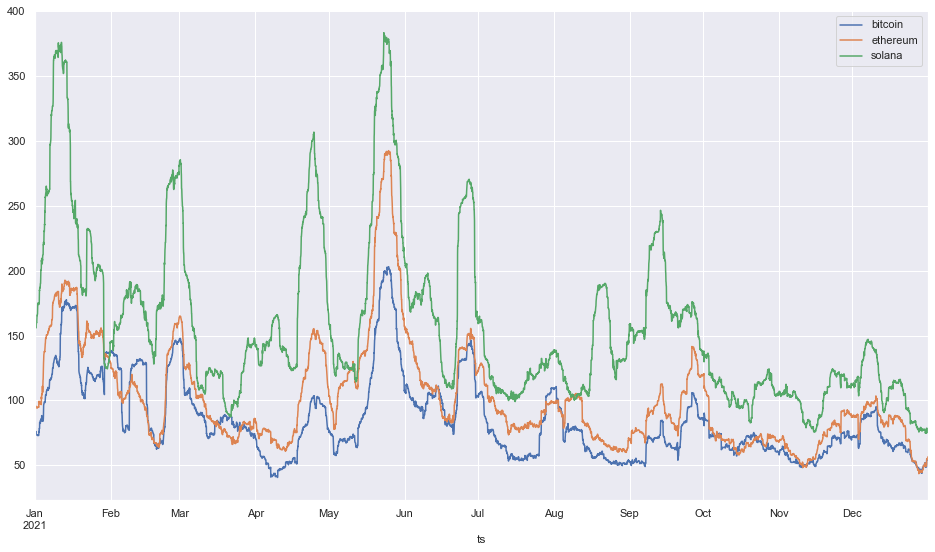

In [4]:
df_all_hourly_data = get_md_for_coins(coins=id_list, start_ts=start_ts, end_ts=end_ts)

realized_vols_rolling_1w = df_all_hourly_data.pct_change().rolling(window_size).std() * ((24 * 365) ** 0.5) * 100

plot_start_date = '1/1/2021'
realized_vols_rolling_1w[plot_start_date:].plot(figsize=(16, 9))

In [ ]:
"""
-get list of coins
-Historical data to get realized vol
-Losses = simulate Impermanent Loss
-Profits = input(volume, fees, token rewards) 
"""

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pycoingecko import CoinGeckoAPI

TS_SCALAR = 1000000
TS_SCALAR_1 = 1000000000
MAX_DAYS_FOR_HOURLY_DATA = 90

cg = CoinGeckoAPI()

In [ ]:
coins = ['bitcoin', 'ethereum']
vs_currencies = 'usd'

In [ ]:
# cg.get_price(ids=coins, vs_currencies=vs_currencies, include_24hr_vol=True)

In [ ]:
cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency=vs_currencies,from_timestamp='1605096000',to_timestamp='1605099600')

In [ ]:
# cg.get_global()

In [ ]:
# cg.get_search_trending()

In [ ]:
# import pytz
# import datetime

# utc_time = datetime.datetime.utcnow()
# tz = pytz.timezone('US/Central')
# tz

In [ ]:
# pytz.utc.localize(utc_time, is_dst=None).astimezone(tz)

In [ ]:
end_ts = pd.Timestamp('11/18/2021')
end_ts = pd.Timestamp.now()
# end_ts = end_ts.tz_localize(tz='US/Central').tz_convert(tz='utc')
end_ts

In [ ]:
start_ts = end_ts - pd.Timedelta(days=MAX_DAYS_FOR_HOURLY_DATA)
start_ts

start_ts = pd.Timestamp('1/1/2020')

In [ ]:
def convert_ts(ts: datetime.datetime):
     return str(int(pd.Timestamp(ts).value / TS_SCALAR_1))
        
# convert_ts(start_ts)

In [ ]:
prices_test = cg.get_coin_market_chart_range_by_id(id='bitcoin',
                                                   vs_currency=vs_currencies,
                                                   from_timestamp=convert_ts(start_ts),
                                                   to_timestamp=convert_ts(end_ts))

# prices_test

In [ ]:
def get_prices(id: str, start_ts: datetime.datetime, end_ts: datetime.datetime):
    
    prices = cg.get_coin_market_chart_range_by_id(id=id,
                                                   vs_currency=vs_currencies,
                                                   from_timestamp=convert_ts(start_ts),
                                                   to_timestamp=convert_ts(end_ts))
    
    df_prices = pd.DataFrame(data=prices['prices'], columns=['ts', id])
    df_prices['ts'] = pd.to_datetime(df_prices['ts'] * TS_SCALAR)
    return df_prices

id_test = 'bitcoin'
id_list = ['bitcoin', 'ethereum', 'solana']

# get_prices(id=id_test, start_ts=start_ts, end_ts=end_ts)

In [ ]:
def get_lookback_data(id: str, ts: datetime.datetime):
    start_ts = ts - pd.Timedelta(days=MAX_DAYS_FOR_HOURLY_DATA)
    return get_prices(id=id, start_ts=start_ts, end_ts=ts)

df_current_prices = get_lookback_data(id=id_test, ts=end_ts)
# df_current_prices.tail(10)

In [ ]:
def get_all_market_data(id: str, start_ts: datetime.datetime, end_ts: datetime.datetime):
    
    data_start_ts = end_ts
    df_list = []
    while data_start_ts >= start_ts:
        this_market_data = get_lookback_data(id=id, ts=data_start_ts)
        df_list.append(this_market_data)
        data_start_ts -=  pd.Timedelta(days=MAX_DAYS_FOR_HOURLY_DATA)
    df_all_data = pd.concat(df_list).sort_values('ts')
    return df_all_data[df_all_data['ts'] > start_ts]


# start_ts_test = pd.Timestamp('9/1/19')
# end_ts_start = pd.Timestamp('11/14/2021')
# end_ts_start = pd.Timestamp.now()

# get_all_market_data(id=id_test, start_ts=start_ts_test, end_ts=end_ts_start)
    

In [ ]:
def get_md_for_coins(coins, start_ts, end_ts):
    df_list = []
    if not isinstance(coins, list):
        coins = [coins]

    for coin in coins:
        this_coin_data = get_all_market_data(id=coin, start_ts=start_ts, end_ts=end_ts).set_index('ts')
        print(this_coin_data)
        df_list.append(this_coin_data)
        
    return pd.concat(df_list, axis=1).resample('1H').last()
        
df_all_hourly_data = get_md_for_coins(coins=id_list, start_ts=start_ts, end_ts=end_ts)

In [ ]:
df_all_hourly_data

In [ ]:
# df.pct_change().rolling(window_size).std()*(252**0.5)

In [ ]:
window_size= 24 * 7

realized_vols_rolling_1w = df_all_hourly_data.pct_change().rolling(window_size).std()*((24 * 365)**0.5) * 100
realized_vols_rolling_1w

In [ ]:
plot_start_date = '1/1/2021'
realized_vols_rolling_1w[plot_start_date:].plot(figsize=(16,9))

## Daily Data

In [ ]:
lookback_days = 500

prices = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency=vs_currencies, days=lookback_days)
df_prices = pd.DataFrame(data=prices['prices'], columns=['ts', 'price'])
df_prices['ts'] = pd.to_datetime(df_prices['ts'] * TS_SCALAR)
# df_prices

In [ ]:
# df_prices.set_index('ts').plot(figsize=(16,9))

In [ ]:
# cg.get_coin_ticker_by_id()

In [ ]:
all_tokens = pd.DataFrame(cg.get_coins_list())
all_tokens

In [ ]:
# cg.get_exchanges_list()

In [ ]:
# cg.get_coin_history_by_id(ids=coins, vs_currencies=vs_currencies, include_24hr_vol=True)